<a href="https://colab.research.google.com/github/sukyoung11/mobis/blob/main/DL_04_MNIST_CLASSIFICATION_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from tensorflow.keras.layers import LayerNormalization
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from keras import utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator

np.random.seed(25)

In [ ]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5, 1.0, 'Class 5')

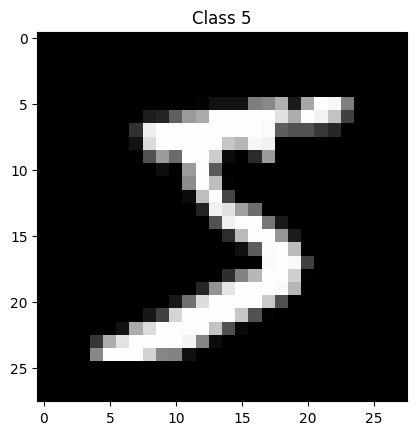

In [ ]:

plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))

In [ ]:

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

(60000, 28, 28, 1)

In [ ]:

number_of_classes = 10

Y_train = utils.to_categorical(y_train, number_of_classes)
Y_test = utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(np.uint8(5), array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]))

In [ ]:
# Three steps to Convolution
# 1. Convolution
# 2. Activation
# 3. Polling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# BatchNormalization(axis=-1)
# model.add(Conv2D(64,(3, 3)))
# model.add(Activation('relu'))
# BatchNormalization(axis=-1)
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,374,506 (9.06 MB)

 Trainable params: 2,374,506 (9.06 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# 모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
modelpath="./MNIST_CNN.hdf5"
#checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
#istory = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=1, callbacks=[early_stopping_callback])


Epoch 1/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.4590 - loss: 1.6331 - val_accuracy: 0.9042 - val_loss: 0.3215
Epoch 2/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9015 - loss: 0.3328 - val_accuracy: 0.9303 - val_loss: 0.2322
Epoch 3/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9290 - loss: 0.2388 - val_accuracy: 0.9478 - val_loss: 0.1767
Epoch 4/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9456 - loss: 0.1803 - val_accuracy: 0.9538 - val_loss: 0.1537
Epoch 5/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9556 - loss: 0.1511 - val_accuracy: 0.9597 - val_loss: 0.1316
Epoch 6/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9596 - loss: 0.1315 - val_accuracy: 0.9621 - val_loss: 0.1261
Epoch 7/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9681 - loss: 0.1085 - val_accuracy: 0.9665 - val_loss: 0.1099
Epoch 8/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9689 - loss: 0.1005 - val_accuracy: 

In [ ]:
# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9745 - loss: 0.0849

 Test Accuracy: 0.9787


In [ ]:
idx=9
sample_image = X_test[idx,:]
sample_label = int(np.argmax(Y_test[idx]))
pred_y = model.predict(np.expand_dims(sample_image, axis=0))
pred_label = int(np.argmax(pred_y))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


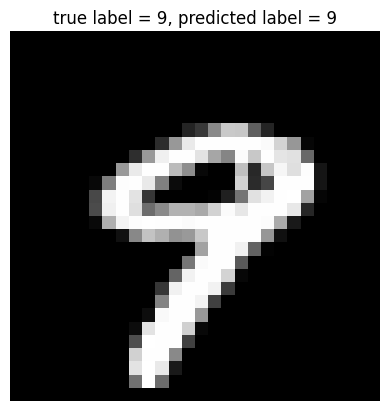

예측이 맞았습니다!


In [ ]:
# 4. 결과 출력
plt.imshow(X_test[idx].reshape(28,28), cmap="gray")
plt.title(f"true label = {sample_label}, predicted label = {pred_label}")
plt.axis("off")
plt.show()

# 맞았는지 확인
if pred_label == sample_label:
    print("예측이 맞았습니다!")
else:
    print("예측이 틀렸습니다.")